Подключение библиотек и загрузка данных:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05

df = pd.read_excel("FPS_hw_x_df_x_taxi.xlsx")
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


Формирование выборки с учётом признака страны:

In [ ]:
df['offer_class_group'].unique()

array(['Premium', 'Delivery', 'Comfort', 'Economy'], dtype=object)

In [ ]:
df_e = df[df['offer_class_group'] == "Economy"]
df_c = df[df['offer_class_group'] == "Comfort"]

print("Выборки одинаковой длины?\n", len(df_e) == len(df_c))

Выборки одинаковой длины?
 True


Визуализация плотности распределения дистанций поездок для классов Economy и Comfort:

<ipython-input-4-4fe62cf87a1f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_e['distance_km'], 50)
<ipython-input-4-4fe62cf87a1f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_c['distance_km'], 50)


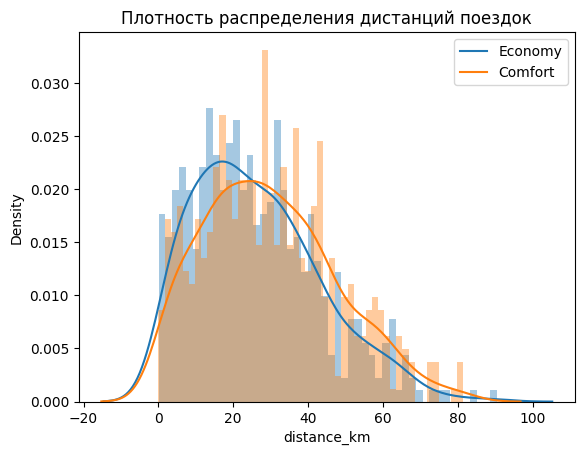

In [ ]:
sns.distplot(df_e['distance_km'], 50)
sns.distplot(df_c['distance_km'], 50)
plt.title('Плотность распределения дистанций поездок')
plt.legend(["Economy", "Comfort"])
plt.show()

H0: На дальние поездки пользователи одинаково используют как Economy-класс, так и Comfort-класс.

H1: На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе.


In [ ]:
# t-критерий Стьюдента

res = ttest_ind(df_e['distance_km'], df_c['distance_km'])
print("p-value = %.8f" % res.pvalue)

print("Отвергаем нулевую гипотезу" if res.pvalue < alpha else "Не отвергаем нулевую гипотезу")

p-value = 0.00156751
Отвергаем нулевую гипотезу


In [ ]:
# U-критерий Манна-Уитни

res = mannwhitneyu(df_e['distance_km'], df_c['distance_km'])
print("p-value = %.8f" % res.pvalue)

print("Отвергаем нулевую гипотезу" if res.pvalue < alpha else "Не отвергаем нулевую гипотезу")

p-value = 0.00128491
Отвергаем нулевую гипотезу


Просмотр описательной статистики по датасету:

In [ ]:
df_e.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,463448.91200,3.896000,22.165311,26.283117,0.422000
std,274029.66119,1.989246,4.063839,17.016153,0.494373
min,3845.00000,1.000000,14.899553,0.089947,0.000000
25%,226962.50000,2.000000,19.006174,13.372229,0.000000
50%,455884.50000,4.000000,21.257715,23.798183,0.000000
75%,721415.75000,6.000000,24.402652,36.845287,1.000000
max,919196.00000,7.000000,39.185553,90.516618,1.000000


In [ ]:
df_c.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,465289.002000,4.106000,22.943699,29.758910,0.486000
std,272443.226582,1.968378,4.842951,17.644643,0.500305
min,2710.000000,1.000000,15.496198,0.024259,0.000000
25%,232141.250000,2.000000,19.430402,16.345205,0.000000
50%,475479.000000,4.000000,21.704980,28.078273,0.000000
75%,697329.750000,6.000000,25.120825,41.300650,1.000000
max,918656.000000,7.000000,50.206056,81.507022,1.000000


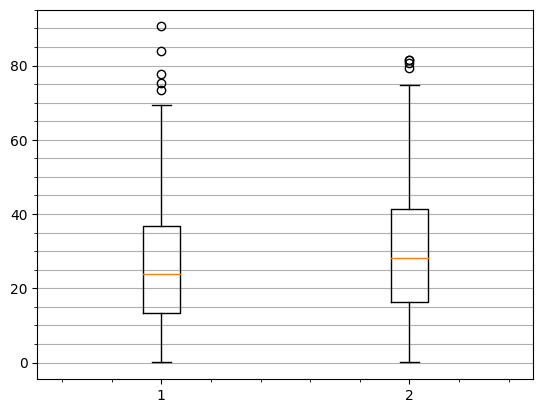

In [ ]:
plt.boxplot([df_e['distance_km'], df_c['distance_km']])
plt.minorticks_on()
plt.grid(True, 'both', 'y')
plt.show()

**Выводы:**

1. Распределения логнормальные.

2. На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе.

3. Согласно графику boxplot: для Economy-класса можно наблюдать широко-распределенные выбросы, медиана и межквартильный размах для Comfort-классе находятся выше, максимальное значение для Comfort-классе больше.